In [2]:
import numpy as np
import cv2

cap = cv2.VideoCapture("C:/Users/sivalohit/OneDrive/Desktop/Short film/3.MP4")

ret, previous_frame = cap.read()
previous_frame_gray = cv2.cvtColor(previous_frame, cv2.COLOR_BGR2GRAY)

while cap.isOpened():
    ret, current_frame = cap.read()
    if not ret:
        break

    current_frame_gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
    hist_previous = cv2.calcHist([previous_frame_gray], [0], None, [256], [0, 256])
    hist_current = cv2.calcHist([current_frame_gray], [0], None, [256], [0, 256])
    hist_diff = cv2.compareHist(hist_previous, hist_current, cv2.HISTCMP_CORREL)

    diff_frame = cv2.absdiff(previous_frame_gray, current_frame_gray)
    _, thresh_frame = cv2.threshold(diff_frame, 30, 255, cv2.THRESH_BINARY)

    motion_event_threshold = 0.9
    if hist_diff < motion_event_threshold:
        print(f"Event detected at frame {cap.get(cv2.CAP_PROP_POS_FRAMES)}")

    contours, _ = cv2.findContours(thresh_frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        if cv2.contourArea(contour) > 500:
            (x, y, w, h) = cv2.boundingRect(contour)
            cv2.rectangle(current_frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imshow("Motion Detection", current_frame)
    
    previous_frame_gray = current_frame_gray
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [32]:
input_path = "C:/Users/sivalohit/OneDrive/Desktop/Short film/3.MP4"
cap = cv2.VideoCapture(input_path)

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

output_path = "C:/Users/sivalohit/Downloads/outputs/output_video.avi"
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), fps, (frame_width, frame_height))

ret, prev_frame = cap.read()
prev_frame_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
event_frames = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    current_frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    diff_frame = cv2.absdiff(prev_frame_gray, current_frame_gray)
    _, thresh_frame = cv2.threshold(diff_frame, 30, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh_frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) > 500:
            (x, y, w, h) = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, "Event Detected", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            event_frames.append(cap.get(cv2.CAP_PROP_POS_MSEC) / 1000)

    out.write(frame)
    prev_frame_gray = current_frame_gray.copy()

cap.release()
out.release()
print(f"Event timestamps (in seconds): {event_frames}")


Event timestamps (in seconds): [0.04, 0.04, 0.04, 0.04, 0.08, 0.08, 0.08, 0.12000000000000001, 0.12000000000000001, 0.12000000000000001, 0.12000000000000001, 0.16, 0.2, 0.28, 0.32, 0.4, 0.4, 3.0000000000000004, 3.04, 3.08, 3.08, 3.12, 3.12, 3.16, 3.16, 3.2, 3.24, 4.12, 6.760000000000001, 6.800000000000001, 6.840000000000001, 6.880000000000001, 6.920000000000001, 6.920000000000001, 6.960000000000001, 7.000000000000001, 7.040000000000001, 7.040000000000001, 7.080000000000001, 7.120000000000001, 8.56, 8.600000000000001, 8.64, 8.680000000000001, 8.72, 8.760000000000002, 8.760000000000002, 11.520000000000001, 11.56, 11.600000000000001, 11.600000000000001, 11.64, 11.64, 11.680000000000001, 11.72, 11.760000000000002, 11.760000000000002, 11.8, 11.840000000000002, 11.88, 11.920000000000002, 11.920000000000002, 11.96, 12.000000000000002, 14.520000000000001, 14.520000000000001, 14.56, 14.56, 14.56, 14.56, 14.600000000000001, 14.600000000000001, 14.600000000000001, 14.64, 14.64, 14.64, 14.64, 14.6

In [33]:
import cv2
import numpy as np
import csv

image_path = "C:/Users/sivalohit/Downloads/archive (14)/6 Emotions for image classification/anger/young-black-couple-arguing-at-dining-table.jpg"
output_folder = "C:/Users/sivalohit/Downloads/outputs"

image = cv2.imread(image_path)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_skin = np.array([0, 20, 70], dtype=np.uint8)
upper_skin = np.array([20, 255, 255], dtype=np.uint8)

skin_mask = cv2.inRange(hsv_image, lower_skin, upper_skin)
kernel = np.ones((3, 3), np.uint8)
skin_mask = cv2.erode(skin_mask, kernel, iterations=2)
skin_mask = cv2.dilate(skin_mask, kernel, iterations=2)
skin = cv2.bitwise_and(image, image, mask=skin_mask)

cv2.imwrite(f'{output_folder}\\Task2-preprocessing.jpg', skin)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

detected_emotions = []
emotion_labels = []

for (x, y, w, h) in faces:
    face_roi = gray_image[y:y+h, x:x+w]
    mouth_region = gray_image[y + int(h / 2):y + h, x:x + w]
    mouth_open = np.mean(mouth_region)

    if mouth_open > 95:
        emotion = "Happy"
    elif 60 <= mouth_open <= 95:
        emotion = "Neutral"
    else:
        emotion = "Sad"

    cv2.putText(image, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 255), 2)
    detected_emotions.append(emotion)
    emotion_labels.append([x, y, w, h, emotion])
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

cv2.imwrite(f'{output_folder}\\Task2-gesture_analysis_optimized_v2.jpg', image)

happy_count = detected_emotions.count("Happy")
sad_count = detected_emotions.count("Sad")
neutral_count = detected_emotions.count("Neutral")

if happy_count > sad_count and happy_count > neutral_count:
    overall_sentiment = "Majority Happy"
elif sad_count > happy_count and sad_count > neutral_count:
    overall_sentiment = "Majority Sad"
else:
    overall_sentiment = "Neutral Crowd"

with open(f'{output_folder}\\Task2-overall_sentiment_optimized_v2.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Face X', 'Face Y', 'Width', 'Height', 'Emotion'])
    writer.writerows(emotion_labels)
    writer.writerow([])
    writer.writerow(['Happy Count', 'Sad Count', 'Neutral Count', 'Overall Sentiment'])
    writer.writerow([happy_count, sad_count, neutral_count, overall_sentiment])

print("Image Processing and Sentiment Analysis Complete!")
print(f"Detected emotions: {detected_emotions}")
print(f"Overall Sentiment: {overall_sentiment}")


Image Processing and Sentiment Analysis Complete!
Detected emotions: ['Happy']
Overall Sentiment: Majority Happy


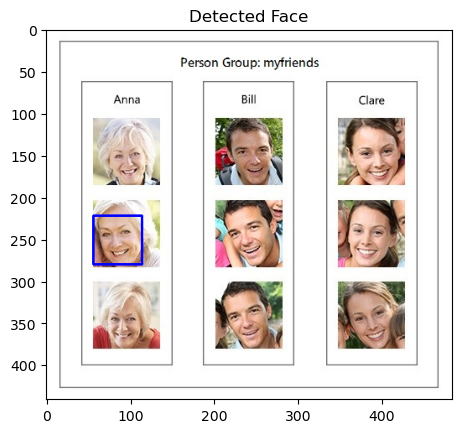

Face Width: 58, Face Height: 58
Identified gender: Female


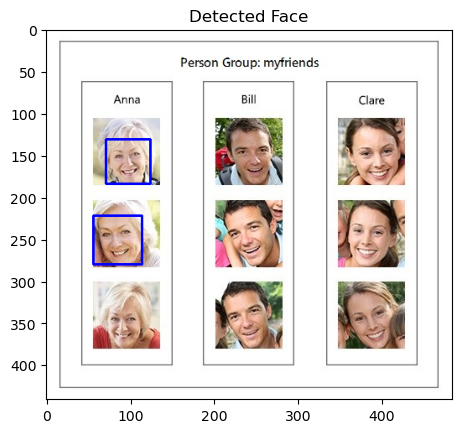

Face Width: 53, Face Height: 53
Identified gender: Female


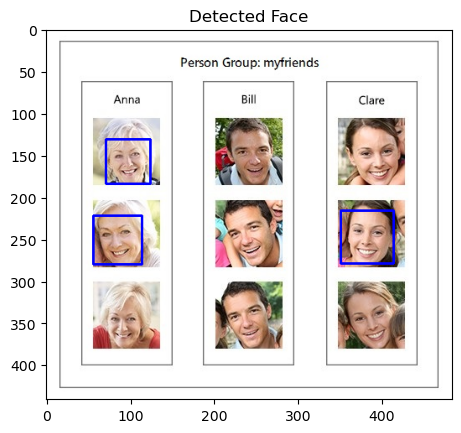

Face Width: 63, Face Height: 63
Identified gender: Female


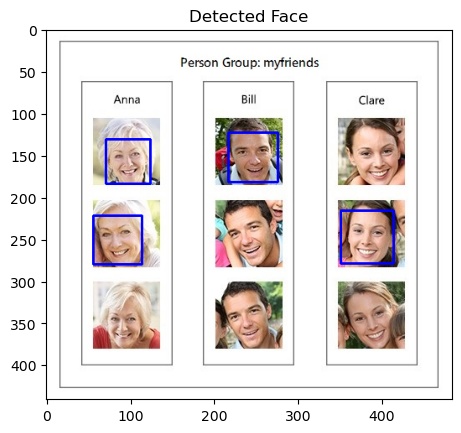

Face Width: 59, Face Height: 59
Identified gender: Female


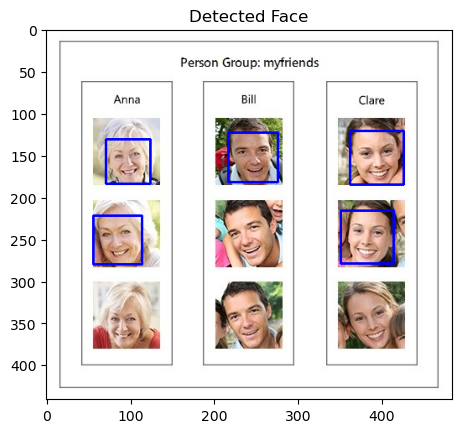

Face Width: 64, Face Height: 64
Identified gender: Female


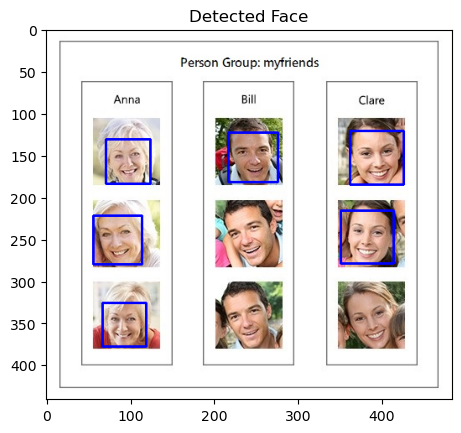

Face Width: 52, Face Height: 52
Identified gender: Female


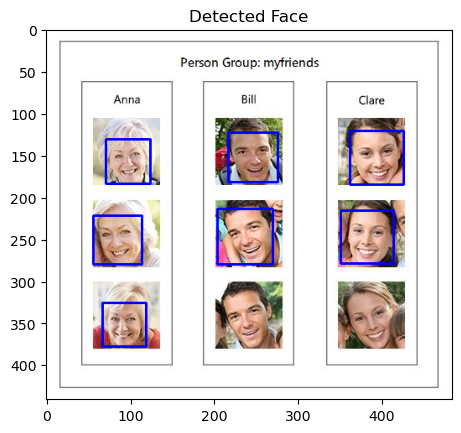

Face Width: 66, Face Height: 66
Identified gender: Female


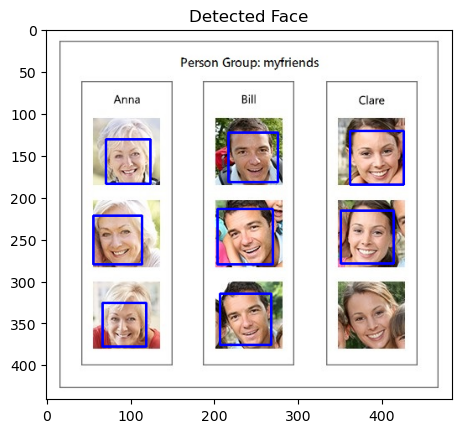

Face Width: 61, Face Height: 61
Identified gender: Female


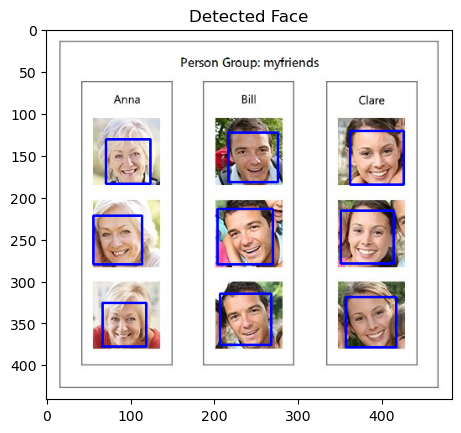

Face Width: 60, Face Height: 60
Identified gender: Female


In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
dataset_path = "C:/Users/sivalohit/Downloads/person.group.clare.jpg"
image = cv2.imread(dataset_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

if len(faces) > 0:
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        face = gray_image[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (200, 200))
        face_width = w
        face_height = h

        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Detected Face")
        plt.show()

        if face_width / face_height > 1.0:
            gender = "Male"
        else:
            gender = "Female"

        print(f"Face Width: {face_width}, Face Height: {face_height}")
        print(f"Identified gender: {gender}")

else:
    print("No face detected!")
